### Create boxplots comparing annual feature tracking derived surface velocity mosaics and annual ITS_LIVE mosaics 
#### Ben Pelto May 30, 2021

In [11]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import geopandas as gpd
import math
from scipy import stats
import xarray as xr
import pickle

import warnings
warnings.filterwarnings("ignore")

def cm2inch(*tupl):### plots in cm ##frontiers 180 mm for full width, 85 mm half width (1 column) figures
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    

In [12]:
fl_path = '/home/pelto/Desktop/ice_flux/Conrad/'
Glacier=['Conrad', 'Illecillewaet','Kokanee','Nordic','Zillmer'];
glacier=['conrad', 'illecillewaet','kokanee','nordic','zillmer']
YR =[2016, 2017, 2018];letter=['A','B','C','D','E']
data = pd.DataFrame(columns=['glacier','source','year','V'])

In [13]:
### import vz

for G in Glacier: 
# G=0
    for Y in YR:

        #open file by glacier name
        fpath=fl_path[:-7]+G+'/'
        with open(fpath + str(Y)+'_vz.pkl', 'rb') as f:
            dc = pickle.load(f)

        #remove distriubuted thickness array
        K=np.array(dc)

        #find where there are values in this array
        IDX= np.ma.where(K > 0, )

        # pull out each value and save it in the dataframe called data
        for i in np.arange(0,len(IDX[0])):
            V=K[IDX[0][i]][IDX[1][i]]

            data=data.append({'glacier':G,'source':'vz','year':Y,'V': V,},ignore_index=True)

#         count+=1
data[10:]

In [16]:
### import vfg
for G in Glacier: 
# G=0
    for Y in YR:

        #open file by glacier name
        fpath=fl_path[:-7]+G+'/'
        with open(fpath + str(Y)+'_Dvfg.pkl', 'rb') as f:
            dc = pickle.load(f)

        #remove distriubuted thickness array
        K=np.array(dc)

        #find where there are values in this array
        IDX= np.ma.where(K > 0, )

        # pull out each value and save it in the dataframe called data
        for i in np.arange(0,len(IDX[0])):
            V=K[IDX[0][i]]

            data=data.append({'glacier':G,'source':'vfg','year':Y,'V': V,},ignore_index=True)

#         count+=1
data[10:]

In [18]:
### import ITS
its_glaciers=['Conrad', 'Illecillewaet','Nordic','Zillmer']
for G in its_glaciers: 
    for Y in YR:

        #open file by glacier name
        fpath=fl_path[:-7]+G+'/'
        with open(fpath + str(Y)+'_ITS.pkl', 'rb') as f:
            dc = pickle.load(f)

        #remove distriubuted thickness array
        K=np.array(dc)

        #find where there are values in this array
        IDX= np.ma.where(K > 0, )

        # pull out each value and save it in the dataframe called data
        for i in np.arange(0,len(IDX[0])):
            V=K[IDX[0][i]][IDX[1][i]]

            data=data.append({'glacier':G,'source':'ITS','year':Y,'V': V,},ignore_index=True)

#         count+=1

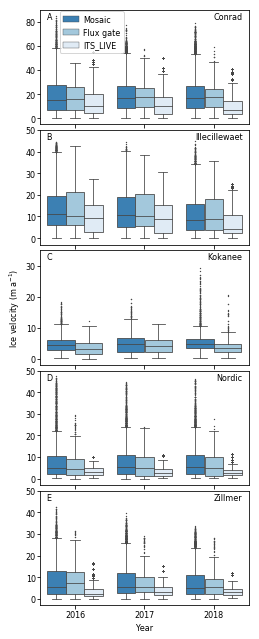

In [25]:
###### Create boxplots

letter=['A','B','C','D','E']
font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1';pylab.rcParams['ytick.major.pad']='1'

import seaborn as sns
fig_path= '/home/pelto/Desktop/ice_flux/figures/'
########### plot for all three glaciers
fig3, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(cm2inch(8.5, 22)),sharex=True) 
a=ax1,ax2,ax3,ax4,ax5
widths=25,25,20
for g in range(5):
    fpath=fl_path[:-7]+Glacier[g]+'/'    
    
    colors = ['#3182bd','#9ecae1','#deebf7']#['#003f5c','#bc5090','#ffa600']
    D=data[data.glacier==Glacier[g]]
    if g==1:
        D.V[D.V>45]=np.nan;D.dropna(subset=['V'],inplace=True); #remove anomalous patch in 2016 in acc. zone
    elif g==0:
        D.V[D.V>85]=np.nan;D.dropna(subset=['V'],inplace=True)
    Bob = sns.boxplot(x=D.year, y=D.V, hue=D.source, palette=colors, saturation=0.85, 
                      linewidth=0.80, fliersize=0.5, ax=a[g]) 
    
    a[g].text(0.03, 0.92, letter[g], transform=a[g].transAxes)
    a[g].text(0.97, 0.92, Glacier[g], transform=a[g].transAxes, ha='right') 
    if g==1: 
        leg = ax1.legend(ncol = 1, bbox_to_anchor=[0.247,1.02],loc='upper center', handletextpad=0.5,columnspacing=0.95)
        new_labels = ['Mosaic', 'Flux gate', 'ITS_LIVE']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)

#     ax2.legend(bbox_to_anchor=[0.44,1.02],loc='upper center', ncol=1, handletextpad=0.5,columnspacing=0.95)
#                (D.V,D.vsource),('Mosaic','FG','ITS_LIVE')
    ax3.legend([],[], frameon=False);ax2.legend([],[], frameon=False);ax4.legend([],[], frameon=False);ax5.legend([],[], frameon=False)              
    
#     leg = ax1.legend(ncol = 1, bbox_to_anchor=[0.44,-0.1],loc='upper center', handletextpad=0.5,columnspacing=0.95)
#     new_labels = ['Mosaic', 'Flux gate', 'ITS_LIVE']
#     for t, l in zip(leg.texts, new_labels): t.set_text(l)        
        
ax3.patch.set_facecolor('white')
ax3.patch.set_alpha(0.0)    

ax1.set(ylabel=(''),ylim=(-5, 90),xlabel=(''));ax2.set(ylabel=(''),ylim=(-3, 50),xlabel=('')) 
ax5.set(ylabel=(''),ylim=(-3, 50),xlabel=('Year'));ax4.set(ylabel=(''),ylim=(-3, 50),xlabel=(''))  
ax3.set(ylabel=('Ice velocity (m a$^{-1}$)'),ylim=(-2, 35),xlabel=(''));
fig3.subplots_adjust(bottom=0.04, top=0.995, hspace=0.05, left=0.125, right=0.99, wspace=0.05)
# fig3.savefig(fig_path + 'All_Velocities_boxplt.pdf', dpi=300)
fig3.savefig(fig_path + 'Surface_ice_velocities_5glaciers_boxplot.pdf', dpi=300)

In [46]:
print(np.nanmean(data.V[(data.glacier=='Conrad')&(data.source=='vz')]).round(2),np.nanmean(data.V[(data.glacier=='Conrad')&(data.source=='vfg')]),np.nanmax(data.V[(data.glacier=='Conrad')&(data.source=='vz')]).round(2))
print(np.nanmean(data.V[(data.glacier=='Kokanee')&(data.source=='vz')]).round(2),np.nanmean(data.V[(data.glacier=='Kokanee')&(data.source=='vfg')]),np.nanmax(data.V[(data.glacier=='Kokanee')&(data.source=='vz')]).round(2))
print(np.nanmean(data.V[(data.glacier=='Illecillewaet')&(data.source=='vz')]).round(2),np.nanmean(data.V[(data.glacier=='Illecillewaet')&(data.source=='vfg')]),np.nanmax(data.V[(data.glacier=='Illecillewaet')&(data.source=='vz')]).round(2))
print(np.nanmean(data.V[(data.glacier=='Nordic')&(data.source=='vz')]).round(2),np.nanmean(data.V[(data.glacier=='Nordic')&(data.source=='vfg')]),np.nanmax(data.V[(data.glacier=='Nordic')&(data.source=='vz')]).round(2))
print(np.nanmean(data.V[(data.glacier=='Zillmer')&(data.source=='vz')]).round(2),np.nanmean(data.V[(data.glacier=='Zillmer')&(data.source=='vfg')]),np.nanmax(data.V[(data.glacier=='Zillmer')&(data.source=='vz')]).round(2))

18.66 17.659666338835713 94.66
4.98 3.873127755073546 29.28
12.63 13.04278486720378 72.9
8.01 6.860298580794729 47.67
8.09 7.898753713939655 42.32
